## Report  4. 한국의 소득수준에 대한 기대수명 예측 문제
1) e-나라지표에서 다음 데이터 수집

    (1)1인당 국민총소득(GNI)
        1 인당 GNI(gniPercap, gni per capita)
        1인당 실질 국민총소득(만 원)
        https://www.index.go.kr/unify/idx-info.do?idxCd=4221
        통계표-시계열조회- 1970~2019 엑셀저장

    (2)성별기대수명
        https://www.index.go.kr/unify/idx-info.do?idxCd=4234#quick_02
        통계표-시계열조회- 1970~2019 엑셀저장

    (3)엑셀파일을 아래 구조로 편집하여 csv파일로 저장
        ( GNI 셀서식 변경: 콤마(,) 없는 숫자)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
gl = pd.read_csv('C:/Users/서지희/OneDrive - 강원대학교/대학/WorkSpace/Python/데이터마이닝/data/GNILifeExp1970_2019.csv',thousands = ',')
display(gl)

,year,GNI,lifeExp_male,lifeExp_female
0,1970,256,58.7,65.8
1,1971,273,59.1,66.3
2,1972,285,59.4,66.8
3,1973,321,59.7,67.3
4,1974,336,60.0,67.8
5,1975,345,60.3,68.2
6,1976,397,60.6,68.6
7,1977,445,60.9,69.1
8,1978,493,61.1,69.5
9,1979,523,61.4,69.9


2)데이터 탐색

    (1)data Load, 0번째 칼럼을 인덱스로 지정
    (2) 데이터 타입, 구조, 누락값 동시에 확인
    (3)데이터 내용 일부 확인
    (4)요약통계
    (5)년도별 GNI 대한 그래프
    (6)전체 기대수명 칼럼추가 , 남,녀 기대수명을 평균으로 계산
    (7) 남,여,전체 기대수명 plotting
    (8)GNI(gniPercap)에 대한 평균기대수명(lifeExp) 관계 확인 (scatter plot)
    (9)전체 데이터의 평균기대수명(lifeExp)과 GNI(gniPercap)의 상관계수 확인

In [ ]:
gl2 = gl[['GNI', 'lifeExp_male', 'lifeExp_female']]
gl2.index = gl['year']
display(gl2)

In [4]:
print(gl2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1970 to 2019
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GNI             50 non-null     int64  
 1   lifeExp_male    50 non-null     float64
 2   lifeExp_female  50 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.6 KB
None


In [5]:
display("상위 5개 데이터", gl2.head())
display("하위 5개 데이터", gl2.tail())


'상위 5개 데이터'

,GNI,lifeExp_male,lifeExp_female
year,,,
1970,256,58.7,65.8
1971,273,59.1,66.3
1972,285,59.4,66.8
1973,321,59.7,67.3
1974,336,60.0,67.8


'하위 5개 데이터'

,GNI,lifeExp_male,lifeExp_female
year,,,
2015,3260,79.0,85.2
2016,3391,79.3,85.4
2017,3493,79.7,85.7
2018,3518,79.7,85.7
2019,3528,80.3,86.3


In [6]:
print(gl2.describe())

               GNI  lifeExp_male  lifeExp_female
count    50.000000     50.000000       50.000000
mean   1642.360000     69.458000       76.992000
std    1062.901742      6.880439        6.240678
min     256.000000     58.700000       65.800000
25%     563.000000     63.025000       71.600000
50%    1640.000000     69.500000       77.800000
75%    2552.750000     75.775000       82.400000
max    3528.000000     80.300000       86.300000


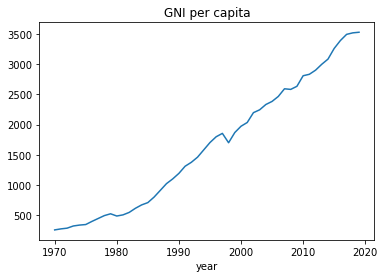

In [7]:
gl2['GNI'].plot()
plt.title('GNI per capita')
plt.show()

In [8]:
gl2['lifeExp'] = (gl2['lifeExp_male'] +gl2['lifeExp_female']) /2
display(gl2.head())


,GNI,lifeExp_male,lifeExp_female,lifeExp
year,,,,
1970,256,58.7,65.8,62.25
1971,273,59.1,66.3,62.70
1972,285,59.4,66.8,63.10
1973,321,59.7,67.3,63.50
1974,336,60.0,67.8,63.90


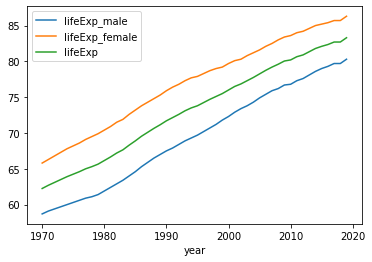

In [9]:
gl2[['lifeExp_male', 'lifeExp_female', 'lifeExp' ]].plot()
plt.show()

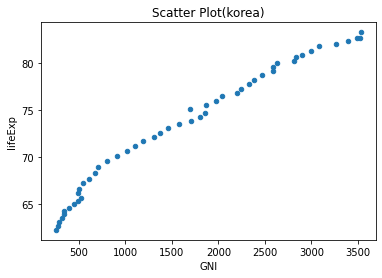

In [10]:
gl2.plot.scatter(x='GNI', y='lifeExp')
plt.title('Scatter Plot(korea)')
plt.show()

In [11]:

print("상관계수 = \n", gl2.corr())

상관계수 = 
                      GNI  lifeExp_male  lifeExp_female   lifeExp
GNI             1.000000      0.991072        0.978407  0.986039
lifeExp_male    0.991072      1.000000        0.995970  0.999088
lifeExp_female  0.978407      0.995970        1.000000  0.998891
lifeExp         0.986039      0.999088        0.998891  1.000000


3)모델링

    (11)GNI(gniPercap)에 대한 평균기대수명(lifeExp) 선형모델 생성 및 확인

In [ ]:
from sklearn.linear_model import LinearRegression

X = gl2['GNI']
y = gl2['lifeExp']

X = X.values.reshape(-1,1)
lr = LinearRegression().fit(X,y)

w = lr.coef_
b = lr.intercept_
print("w (lr.coef_) : ", w)
print("b (lr.intercept_) : ", b)

#X_new = np.array([[1600],[2300],[3200]])
X_new = np.array([[1600,2300,3200]]).reshape(-1,1)

print("X_new = ",X_new)
prediction = lr.predict(X_new)
print("Y1 = {}".format(prediction))

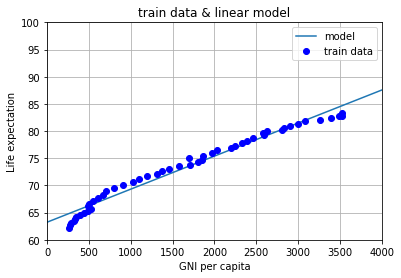

In [13]:

line = np.linspace(0,4000,100).reshape(-1,1)
py1 = lr.predict(line)


plt.plot(line, py1)
plt.plot(X,y,'o', c= 'b')
plt.xlabel('GNI per capita')
plt.ylabel('Life expectation')
plt.title('train data & linear model')
plt.ylim(60,100)
plt.xlim(0,4000)
plt.grid()
plt.legend(['model','train data'])
plt.show()